In [1]:
import pandas as pd
from numpy import loadtxt

data = pd.read_csv('smartwatch_data.csv')

# Mostrar las primeras filas
data.head()

,battery_duration,screen_size,memory,has_GPS,has_Bluetooth,water_resistant,price_range
0,59.955851,1.277699,19.702341,0,1,1,2
1,115.268573,1.812851,18.818728,0,1,0,2
2,94.271418,2.309419,58.375275,0,0,1,3
3,81.471214,2.098337,18.972772,1,0,0,2
4,38.977789,2.209842,20.316984,0,0,0,1


In [2]:
data.describe()

,battery_duration,screen_size,memory,has_GPS,has_Bluetooth,water_resistant,price_range
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,71.064629,1.760526,34.144344,0.491000,0.506000,0.503000,1.662000
std,28.045187,0.438285,17.440452,0.500169,0.500214,0.500241,1.084865
min,24.444674,1.004827,4.000698,0.000000,0.000000,0.000000,0.000000
25%,46.653434,1.361611,19.681059,0.000000,0.000000,0.000000,1.000000
50%,71.693508,1.778101,34.036835,0.000000,1.000000,1.000000,2.000000
75%,95.454680,2.140698,49.546212,1.000000,1.000000,1.000000,3.000000
max,119.972897,2.499121,63.869251,1.000000,1.000000,1.000000,3.000000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   battery_duration  1000 non-null   float64
 1   screen_size       1000 non-null   float64
 2   memory            1000 non-null   float64
 3   has_GPS           1000 non-null   int64  
 4   has_Bluetooth     1000 non-null   int64  
 5   water_resistant   1000 non-null   int64  
 6   price_range       1000 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 54.8 KB


In [4]:
data.isnull().sum()

battery_duration    0
screen_size         0
memory              0
has_GPS             0
has_Bluetooth       0
water_resistant     0
price_range         0
dtype: int64

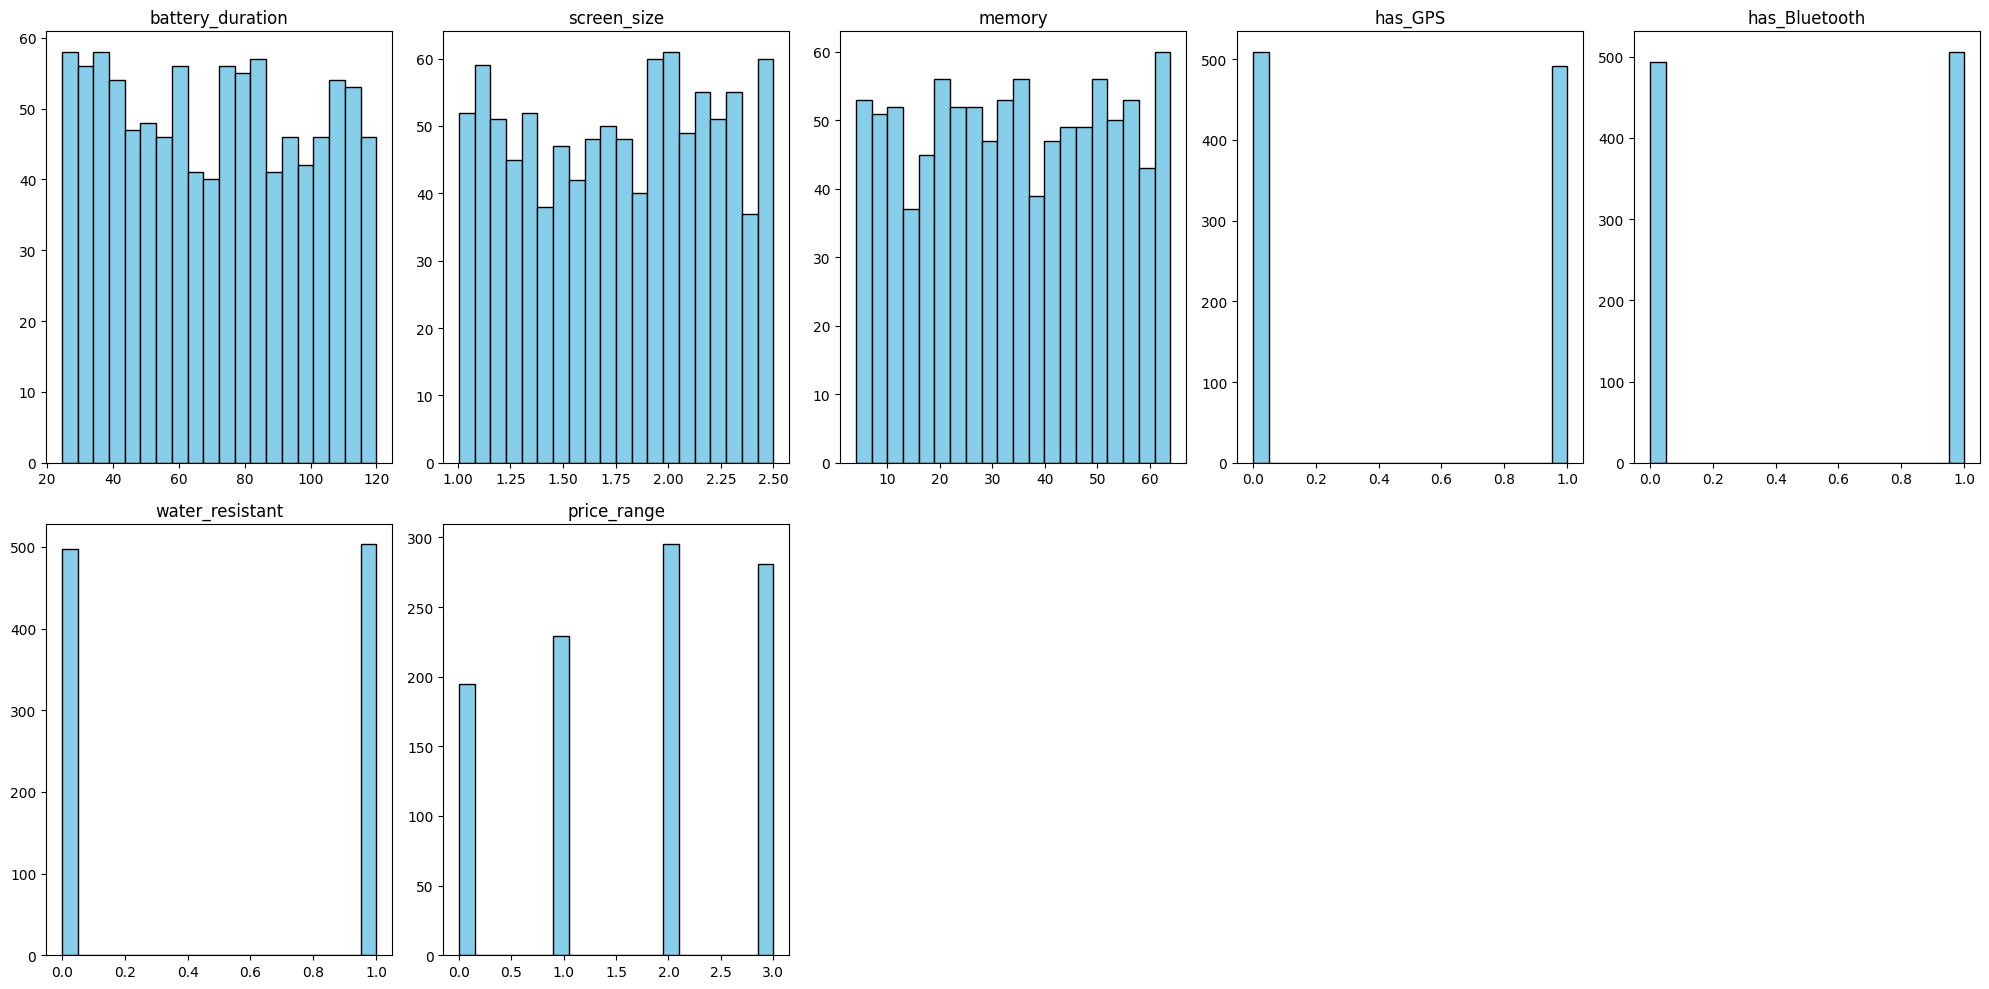

In [5]:
import matplotlib.pyplot as plt

# Visualizar histogramas en 5 columnas
plt.figure(figsize=(20, 10))  # Ajustar el tamaño del gráfico

for i, col in enumerate(data.columns):
    plt.subplot((len(data.columns) + 4) // 5, 5, i + 1)  # Filas calculadas automáticamente
    plt.hist(data[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(col)
    plt.tight_layout()

plt.show()

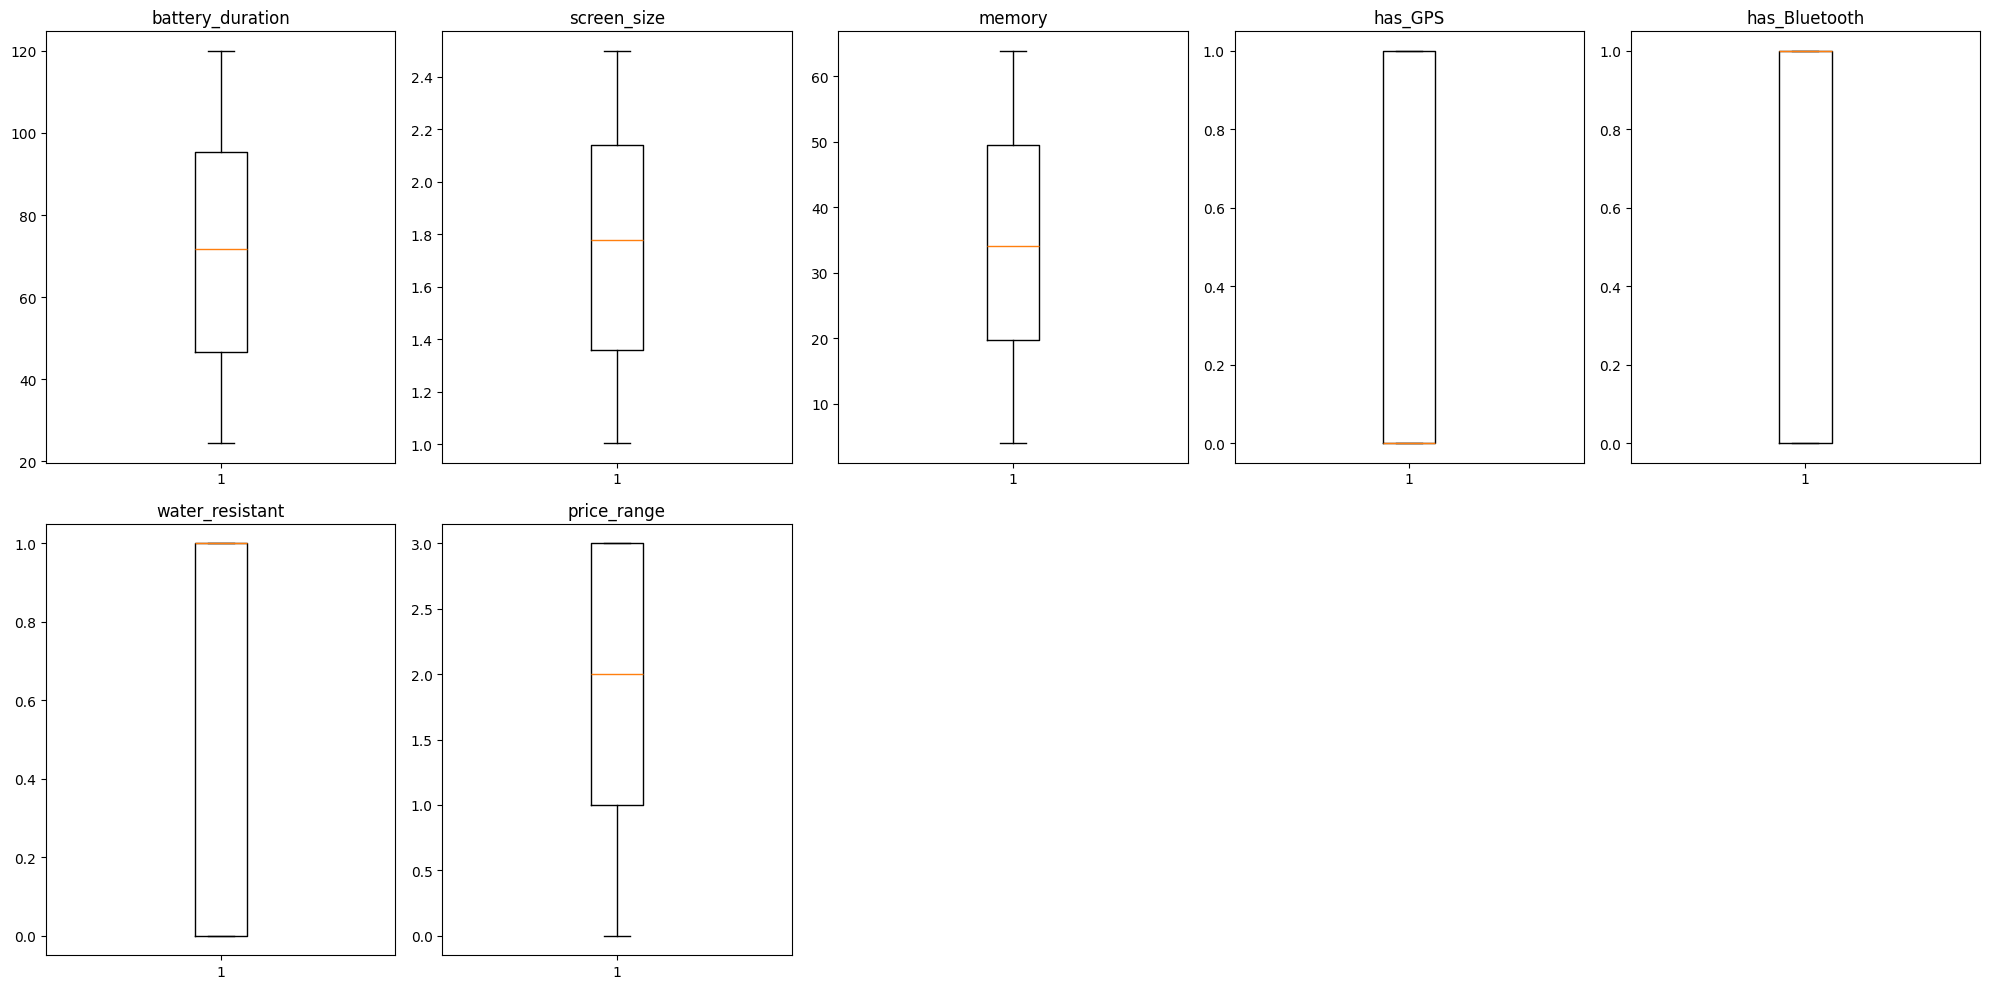

In [6]:
import matplotlib.pyplot as plt

# Visualizar boxplots en 5 columnas
plt.figure(figsize=(20, 10))  # Tamaño del gráfico

for i, col in enumerate(data.columns):
    plt.subplot((len(data.columns) + 4) // 5, 5, i + 1)  # 5 columnas
    plt.boxplot(data[col])
    plt.title(col)
    plt.tight_layout()

plt.show()


In [7]:
data['price_range'].value_counts()

price_range
2    295
3    281
1    229
0    195
Name: count, dtype: int64

In [8]:
data.shape

(1000, 7)

## Red Neuronal Keras

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# ========= PASO 1: SEPARAR LAS VARIABLES INDEPENDIENTES Y OBJETIVO =========
X = data.drop('price_range', axis=1)
y = data['price_range']

# ========= PASO 2: DIVIDIR EN TRAIN/TEST ============
X_train, X_test, y_train_raw, y_test_raw = train_test_split(X, y, test_size=0.2, random_state=42)

# ========= PASO 3: ESCALAR =========
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

# ========= PASO 4: CONVERTIR LAS ETIQUETAS A ONE-HOT =========
y_train = to_categorical(y_train_raw, num_classes=4)
y_test = to_categorical(y_test_raw, num_classes=4)

# ========= PASO 5: DEFINIR EL MODELO =========
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_norm.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(4, activation='softmax')  # 4 clases
])

# ========= PASO 6: COMPILAR =========
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# ========= PASO 7: CALLBACK DE EARLY STOPPING =========
early_stop = EarlyStopping(
    monitor='val_loss', 
    patience=10, 
    restore_best_weights=True, 
    verbose=1
)

# ========= PASO 8: ENTRENAR =========
historial = model.fit(
    X_train_norm, y_train,
    epochs=100,
    batch_size=64,
    validation_data=(X_test_norm, y_test),
    callbacks=[early_stop],
    verbose=1
)

# ========= PASO 9: EVALUAR =========
loss, accuracy = model.evaluate(X_test_norm, y_test, verbose=1)
print(f"Accuracy: {accuracy * 100:.2f}%")


Epoch 1/100


C:\Users\Diego\anaconda3\envs\gpu_env\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.2230 - loss: 1.3991 - val_accuracy: 0.3100 - val_loss: 1.3177
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3929 - loss: 1.2764 - val_accuracy: 0.3600 - val_loss: 1.1871
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4928 - loss: 1.1406 - val_accuracy: 0.5150 - val_loss: 1.0486
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6018 - loss: 0.9941 - val_accuracy: 0.6250 - val_loss: 0.9136
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6937 - loss: 0.8651 - val_accuracy: 0.7150 - val_loss: 0.7877
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7031 - loss: 0.7540 - val_accuracy: 0.7600 - val_loss: 0.6822
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7138 - loss: 0.6843 - val_accuracy: 0.7750 - val_loss: 0.6060
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7757 - loss: 0.5887 - val_accuracy: 0.7950 - val_loss: 0.

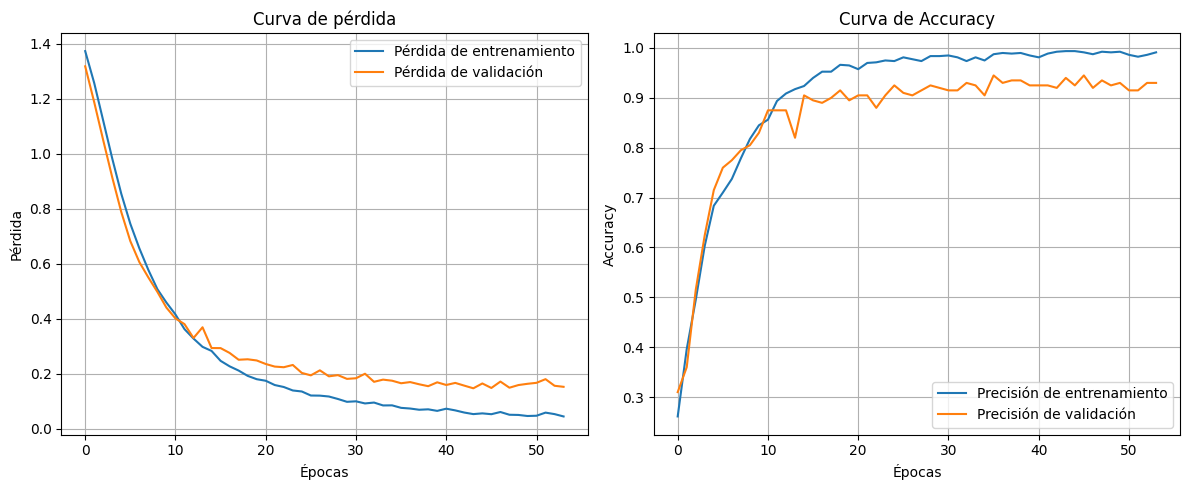

In [10]:
import matplotlib.pyplot as plt

# Graficar pérdida
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(historial.history['loss'], label='Pérdida de entrenamiento')
plt.plot(historial.history['val_loss'], label='Pérdida de validación')
plt.title('Curva de pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)

# Graficar accuracy
plt.subplot(1, 2, 2)
plt.plot(historial.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(historial.history['val_accuracy'], label='Precisión de validación')
plt.title('Curva de Accuracy')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


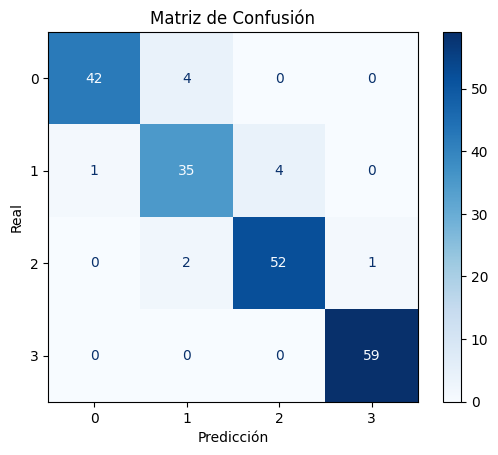

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Obtener las predicciones del modelo como probabilidades (shape: [n, 4])
y_pred = model.predict(X_test_norm)

# Convertir probabilidades a clases (índice de mayor probabilidad)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convertir y_test de one-hot a etiquetas (si aún es one-hot)
y_test_labels = np.argmax(y_test, axis=1)

# Generar la matriz de confusión
cm = confusion_matrix(y_test_labels, y_pred_classes)

# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2, 3])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión")
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()
